The dataset going to be analyzed is Global Terrorism Database (GTD), which can be downloaded from this link: https://www.start.umd.edu/gtd/ . This dataset contains details on the terrorist attacks around the world from 1970 - 2016 with more than 170,000 cases. The analysis involves cleaning of data, data visualization and comparison of various machine learning methods to predict the terrorist organization responsible for the attack. 

In [1]:
#Import the various libraries required
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_similarity_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [2]:
#read the csv file
rawData = pd.read_csv('dataset.csv', encoding = "ISO-8859-1");
rawData.head()

C:\Users\Salman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#check the size of data
rawData.shape

(170350, 135)

In [4]:
rawData.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.703500e+05,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170346.000000,...,1.279000e+03,4.960000e+02,7.070000e+02,487.000000,9911.000000,9322.000000,170350.000000,170350.000000,170350.000000,170350.000000
mean,2.001776e+11,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,1.454428,...,3.224502e+06,4.519918e+05,3.849663e+05,272.462012,4.624458,-28.717335,-4.583387,-4.510555,0.091083,-3.975128
std,1.314444e+09,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,1.009005,...,3.090625e+07,6.070186e+06,2.435027e+06,3130.068208,2.041008,58.737198,4.542694,4.630440,0.583166,4.691492
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990053e+11,1990.000000,4.000000,8.000000,0.000000,75.000000,5.000000,11.263580,2.396199,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.007121e+11,2007.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.472680,43.130000,1.000000,...,1.420000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014023e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.744167,68.451297,1.000000,...,4.000000e+05,0.000000e+00,7.356800e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017013e+11,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


After reading the details of each feature from codebook provided on https://www.start.umd.edu/gtd , choose the features which are important

In [6]:
#take the important features and check for the missing values of each feature
impData = rawData[['iyear','imonth','iday','extended','doubtterr','specificity','crit1','crit2','crit3','multiple','country','region','city','vicinity','attacktype1','natlty1','weaptype1','weapsubtype1','suicide','success','targtype1','targsubtype1','ishostkid','ransom','nperps','claimed','claimmode','nkill','nkillter','nwound','nwoundte','property','nreleased','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','gname']];
pd.isnull(impData).sum()

iyear                0
imonth               0
iday                 0
extended             0
doubtterr            0
specificity          4
crit1                0
crit2                0
crit3                0
multiple             0
country              0
region               0
city               446
vicinity             0
attacktype1          0
natlty1           1394
weaptype1            0
weapsubtype1     19426
suicide              0
success              0
targtype1            0
targsubtype1      9345
ishostkid          178
ransom           94037
nperps           71124
claimed          66134
claimmode       154102
nkill             9682
nkillter         66663
nwound           15325
nwoundte         68749
property             0
nreleased       161028
INT_LOG              0
INT_IDEO             0
INT_MISC             0
INT_ANY              0
gname                0
dtype: int64

In [7]:
impData.gname.describe()

count      170350
unique       3454
top       Unknown
freq        78306
Name: gname, dtype: object

In [8]:
#Check the distribution of class to check how balanced it is
impData.gname.value_counts()

Unknown                                             78306
Taliban                                              6575
Shining Path (SL)                                    4551
Islamic State of Iraq and the Levant (ISIL)          4287
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           2683
Irish Republican Army (IRA)                          2669
Revolutionary Armed Forces of Colombia (FARC)        2481
New People's Army (NPA)                              2414
Kurdistan Workers' Party (PKK)                       2152
Boko Haram                                           2077
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1766
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1483
Maoists                                              1424
Tehrik-i-Taliban Pakistan (TTP)                      1252
Palestinians  

In [23]:
#Pecentage of missing labels
misVal = impData[impData.gname == 'Unknown'].gname.count();
misVal = (misVal/len(impData.gname))*100;
print('The percentage of missing data: %f%%' %misVal);

The percentage of missing data: 45.967714%


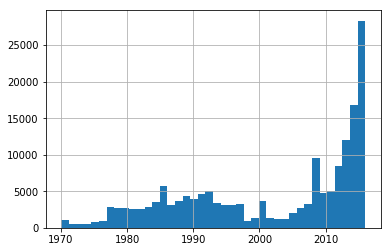

In [9]:
#First lets see the frequency of terrorist attacks w.r.t year
impData.iyear.hist(bins = 40)

Lets try to predict the terrorist organizations using the features with no/few missing values and check the performances.

In [24]:
#Fill the 4 missing values of specificity using mode corresponding to the country
newData = impData.drop(['city','natlty1','weapsubtype1','targsubtype1','ransom','nperps','claimed','claimmode','nkill','nkillter','nwound','nwoundte','nreleased'],axis = 1);
ind = np.array(newData[pd.isnull(newData['specificity'])].country);
temp = np.zeros(ind.shape)
for i in range(len(ind)):
    temp[i] = newData[newData.country == ind[i]].specificity.mode();
newData.loc[pd.isnull(newData['specificity']),'specificity'] = temp;
#Replace the unknown values with -9 which represents unknown
newData.ishostkid.fillna(-9,inplace = True);
#Remove the unknown labels and class with frequency less than 10
unknownData = newData[newData.gname == 'Unknown'];
newData = newData[newData.gname != 'Unknown'];
newData = newData.groupby('gname').filter(lambda x: len(x) >= 10);
#Split data into feature and label
X = np.array(newData.drop(['gname'],1));
y = newData.gname;
y.describe()

count       85862
unique        559
top       Taliban
freq         6575
Name: gname, dtype: object

In [25]:
#Convert the labels into integers
y = y.astype('category');
y = y.cat.codes;
y = np.array(y);

In [26]:
#Standardizing the data
stdX = preprocessing.scale(X);
#Split the data into test and train using stratified random sampling since classes are not balanced
Xtrain, Xtest, ytrain, ytest = train_test_split(stdX,y,test_size = 0.2,shuffle = True,stratify = y);

First lets fit a linear SVM classifier

In [13]:
#SVM with linear kernel, Try using other kernel like poly or RBF
clf = svm.LinearSVC(class_weight='balanced');
clf.fit(Xtrain, ytrain);
y_pred = clf.predict(Xtest);
#Check the performance of the model
acc = accuracy_score(ytest, y_pred);
pre = precision_score(ytest, y_pred, average='weighted');
rec = recall_score(ytest, y_pred, average='weighted');
print('Accuracy: %f , Precision: %f , Recall: %f ' %(acc, pre, rec));

Accuracy: 0.368485 , Precision: 0.558770 , Recall: 0.368485 


C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Now lets fit a decision tree model and a random forest model

In [14]:
#Decision Tree
clf2 = DecisionTreeClassifier(class_weight = 'balanced');
clf2.fit(Xtrain, ytrain);
y_pred2 = clf2.predict(Xtest);
#Check the performance of the model
acc = accuracy_score(ytest, y_pred2);
pre = precision_score(ytest, y_pred2, average='weighted');
rec = recall_score(ytest, y_pred2, average='weighted');
print('Accuracy: %f , Precision: %f , Recall: %f ' %(acc, pre, rec));

Accuracy: 0.804402 , Precision: 0.809865 , Recall: 0.804402 


C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
#Lets use 25 number of trees in the forest, however chooose more according to your laptop
clf3 = RandomForestClassifier(n_estimators=25,bootstrap = True, class_weight = 'balanced');
clf3.fit(Xtrain, ytrain);
y_pred3 = clf3.predict(Xtest);
#Check the performance of the model
acc = accuracy_score(ytest, y_pred3);
pre = precision_score(ytest, y_pred3, average='weighted');
rec = recall_score(ytest, y_pred3, average='weighted');
print('Accuracy: %f , Precision: %f , Recall: %f ' %(acc, pre, rec));

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.821872 , Precision: 0.809068 , Recall: 0.821872 


It can be seen that the performance of decision trees and random forest is much better than SVM classifier. Moreover, using only a few features, a good model with accuracy around 80% can be obtained using decision trees and random forests. Lets check how our Decision tree model works on Unknown data and if the predictions makes sense.

In [16]:
Xunknown = np.array(unknownData.drop(['gname'],1));
ypred_u = clf2.predict(Xunknown);

In [17]:
#Calculate the jaccard index using the comparable important features - extended, Country, region, attacktype1, weapontype1, targttype1,ishostkid
relUnknown = Xunknown[:,[3,10,11,13,14,15,16,17,18]];
maxScore = np.zeros(len(relUnknown));
#Iterate through the loop to find max similarity distance from relevant data
for i in range(len(relUnknown)):
    relData = X[y == ypred_u[i]];
    relData = relData[:,[3,10,11,13,14,15,16,17,18]];
    dist = np.zeros(len(relData));
    for j in range(len(relData)):
        dist[j] = jaccard_similarity_score(relData[j,:], relUnknown[i,:]);
    maxScore[i] = np.amax(dist);
avgscore = np.mean(maxScore);
maxscore = np.amax(maxScore);

The mean Jaccard distance: 0.694102
The mean Jaccard distance: 1.000000


In [18]:
print('The mean Jaccard distance: %f' %avgscore);
print('The max Jaccard distance: %f' %maxscore);

The mean Jaccard distance: 0.694102
The max Jaccard distance: 1.000000


Now, lets try to use all the features, ignoring every row with any missing value 

In [19]:
impData = rawData[['iyear','imonth','iday','extended','doubtterr','specificity','crit1','crit2','crit3','multiple','country','region','city','vicinity','attacktype1','natlty1','weaptype1','weapsubtype1','suicide','success','targtype1','targsubtype1','ishostkid','ransom','nperps','claimed','claimmode','nkill','nkillter','nwound','nwoundte','property','nreleased','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','gname']];
dropData = impData.dropna();
dropData.shape

(815, 38)

If we drop any row with any missing values, we end up with almost no data. Therefore, now we should try to fill the missing values. The features with alot of missing values should not be filled with mean or mode or knn because that would decrease variance and introduce bias in the model. However, lets try to fill the missing values in the following features -  city, natlty1, weapsubtype1 and targsubtype1 see if it increases the accuracy.

In [39]:
#Remove the other features with too many missing values.
mfData = impData.drop(['ransom','nperps','claimed','claimmode','nkillter','nwoundte','nreleased'],axis = 1);
ind = np.array(mfData[pd.isnull(mfData['specificity'])].country);
temp = np.zeros(ind.shape)
for i in range(len(ind)):
    temp[i] = mfData[mfData.country == ind[i]].specificity.mode();
mfData.loc[pd.isnull(mfData['specificity']),'specificity'] = temp;
#Replace all the unknown values in ishostkid
mfData.ishostkid.fillna(mfData.ishostkid.mode(),inplace = True);
#Replace the missing values in nkill and nwound
mfData.nkill.fillna(mfData.nkill.median(),inplace = True);
mfData.nwound.fillna(mfData.nwound.median(),inplace = True);
mfData.fillna(-1,inplace = True);
#Convert City from categorical to numeric
mfData.city = mfData.city.astype('category');
mfData.city = mfData.city.cat.codes;
#Remove the unknown labels and class with frequency less than 10
unknownData2 = mfData[mfData.gname == 'Unknown'];
mfData = mfData[mfData.gname != 'Unknown'];
mfData = mfData.groupby('gname').filter(lambda x: len(x) >= 10);
#Split data into feature and label
X = np.array(mfData.drop(['gname'],1));
y = mfData.gname;
#Convert the labels into integers
y = y.astype('category');
y = y.cat.codes;
y = np.array(y);

In [40]:
#Standardizing the data
stdX = preprocessing.scale(X);
#Split the data into test and train using stratified random sampling since classes are not balanced
Xtrain, Xtest, ytrain, ytest = train_test_split(stdX,y,test_size = 0.2,shuffle = True,stratify = y);

In [41]:
#SVM with linear kernel
clf = svm.LinearSVC(class_weight='balanced');
clf.fit(Xtrain, ytrain);
y_pred = clf.predict(Xtest);
#Check the performance of the model
acc = accuracy_score(ytest, y_pred);
pre = precision_score(ytest, y_pred, average='weighted');
rec = recall_score(ytest, y_pred, average='weighted');
print('Accuracy: %f , Precision: %f , Recall: %f ' %(acc, pre, rec));

Accuracy: 0.376987 , Precision: 0.584556 , Recall: 0.376987 


C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
#Decision Tree
clf2 = DecisionTreeClassifier(class_weight = 'balanced');
clf2.fit(Xtrain, ytrain);
y_pred2 = clf2.predict(Xtest);
#Check the performance of the model
acc = accuracy_score(ytest, y_pred2);
pre = precision_score(ytest, y_pred2, average='weighted');
rec = recall_score(ytest, y_pred2, average='weighted');
print('Accuracy: %f , Precision: %f , Recall: %f ' %(acc, pre, rec));

Accuracy: 0.803587 , Precision: 0.809244 , Recall: 0.803587 


C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
#Lets use 10 (default) number of trees in the forest, however chooose more according to your working environment
clf3 = RandomForestClassifier(bootstrap = True, class_weight = 'balanced');
clf3.fit(Xtrain, ytrain);
y_pred3 = clf3.predict(Xtest);
#Check the performance of the model
acc = accuracy_score(ytest, y_pred3);
pre = precision_score(ytest, y_pred3, average='weighted');
rec = recall_score(ytest, y_pred3, average='weighted');
print('Accuracy: %f , Precision: %f , Recall: %f ' %(acc, pre, rec));

Accuracy: 0.812671 , Precision: 0.797780 , Recall: 0.812671 


C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Even after including new features, the models accuracies don't change by much. SVM with linear kernel does not fit well with the data. To increase the accuracy of SVM, polynomial or RBF kernel should be implemented. Moreover, random forests performance is almost identical to decision trees. 